<a href="https://colab.research.google.com/github/APARNA2205/assignment-8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [64]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [26]:
df.shape

(804, 12)

In [27]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [28]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [30]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [31]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


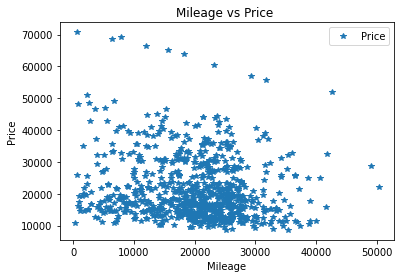

In [32]:
df.plot(x='Mileage', y='Price', style='*')
plt.title('Mileage vs Price ')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [33]:
X = df[['Mileage']].values #feature
y = df['Price'].values  #target

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([28777.95969479,  9789.03767552, 49248.15896668, 25097.47324918,
       14771.00346439, 26302.07428434, 12846.06159316, 11328.95886778,
       12379.12647335, 31002.73441998, 12383.40281062, 40966.60741222,
       23573.8220022 ,  9654.06014156, 11137.04565492, 33540.53610509,
       38600.23956094, 46747.67327034, 13518.23525162, 32737.08454595,
       21831.82291637, 52001.99437855, 21020.83677661, 22113.62802409,
       15622.12109788, 23578.16486067, 15295.01826688, 34739.2149604 ,
       15084.81540427, 44084.91421156, 11169.91838816, 27548.62960952,
       21383.0671605 , 21335.85248489, 12469.52757633, 32197.34046608,
       36245.15822782, 16218.84786194, 17675.83748814, 21982.64770827,
       35866.5827089 , 14411.85885055, 35575.41704894, 18529.34211711,
       17360.81063528, 19689.740844  , 23348.0169541 , 21281.88048759,
       17162.87344059, 11521.52588814, 40619.07227011,  9563.7893088 ,
       12487.05429274, 35622.13949546, 25299.96963871, 26653.23939042,
      

In [34]:
X_train.shape, X_test.shape

((643, 1), (161, 1))

In [35]:
from sklearn.linear_model import LinearRegression # fitting the model
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [36]:
print(regressor.intercept_)

24551.787933963416


In [53]:
print(regressor.coef_)

[-8.08805828e-06]


In [38]:
regressor.predict([[7.5]])

array([24550.48544324])

In [39]:
y_pred = regressor.predict(X_test) 
y_pred

array([16043.74486382, 20559.91436514, 23390.83453591, 22040.41215398,
       20686.86379431, 22285.45407539, 19765.56868935, 17614.54867614,
       19133.60019039, 21931.69759494, 20198.16927492, 23253.46518096,
       22386.87468638, 21220.36399458, 20647.09441089, 20917.83881591,
       21575.50979847, 21887.23924491, 20039.78640296, 21232.69424009,
       20112.20488718, 17137.83707141, 20114.63620319, 20732.53780234,
       20519.79765086, 21226.44228462, 19806.38006534, 20080.42411353,
       21977.37160297, 20841.07869595, 20665.15561558, 20014.60491564,
       23286.28794719, 22773.97492935, 21128.49498222, 23880.22371702,
       19993.07040235, 22260.09892264, 23660.71061378, 20996.5092556 ,
       20311.74646599, 19865.25264604, 20602.63606086, 19330.88411862,
       24398.78869033, 19849.44909193, 20379.12865274, 21527.05714356,
       20934.51069717, 18473.84522267, 19327.58447545, 21204.7341059 ,
       19603.71250879, 22756.08739008, 21153.32913868, 20628.68587533,
      

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,28777.959695,16043.744864
1,9789.037676,20559.914365
2,49248.158967,23390.834536
3,25097.473249,22040.412154
4,14771.003464,20686.863794
...,...,...
156,39713.667922,22994.530025
157,33287.409599,20790.021060
158,17314.103129,23124.084436
159,11504.824550,18653.762608


In [41]:
regressor.predict([[95]]) 

array([24535.28971813])

## Evaluation Metrics

In [42]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
#regressor.score(X_test,y_test) 

R2- SCORE: 0.003554047189701648


## Mileage vs Cylinder

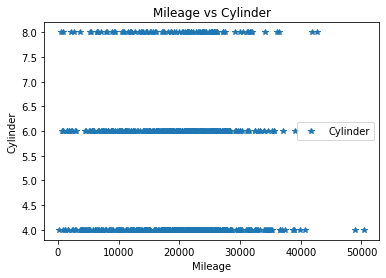

In [48]:
df.plot(x='Mileage', y='Cylinder', style='*')
plt.title('Mileage vs Cylinder')
plt.xlabel('Mileage')
plt.ylabel('Cylinder')
plt.show()

In [49]:
X = df[['Mileage']].values #feature
y = df['Cylinder'].values  #target

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([8, 4, 4, 8, 6, 6, 4, 6, 4, 6, 8, 6, 4, 4, 4, 6, 8, 8, 4, 6, 6, 6,
       6, 8, 6, 4, 6, 6, 6, 4, 4, 6, 6, 6, 6, 4, 4, 4, 8, 6, 6, 4, 4, 4,
       6, 6, 4, 4, 8, 6, 4, 6, 6, 4, 8, 4, 6, 6, 6, 8, 4, 4, 4, 6, 4, 6,
       4, 4, 8, 4, 8, 6, 4, 6, 8, 6, 6, 8, 4, 6, 8, 6, 4, 4, 4, 4, 6, 4,
       4, 4, 4, 6, 8, 4, 6, 8, 4, 4, 4, 6, 4, 4, 4, 6, 4, 6, 4, 6, 8, 6,
       4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 4, 6, 6, 4, 4, 6, 4, 4, 6, 4,
       4, 4, 6, 4, 8, 6, 6, 4, 6, 4, 4, 4, 6, 4, 4, 8, 4, 4, 6, 6, 6, 4,
       4, 6, 4, 8, 4, 6, 6])

In [50]:
X_train.shape, X_test.shape

((643, 1), (161, 1))

In [51]:
from sklearn.linear_model import LinearRegression # fitting the model
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [55]:
print(regressor.intercept_)

5.408890415994555


In [56]:
print(regressor.coef_)

[-8.08805828e-06]


In [57]:
regressor.predict([[7.5]])

array([5.40882976])

In [58]:
y_pred = regressor.predict(X_test) 
y_pred

array([5.17223383, 5.34926525, 5.24410432, 5.21618434, 5.2018523 ,
       5.2833961 , 5.20283904, 5.36333847, 5.32352096, 5.23233619,
       5.20507944, 5.22587383, 5.2569158 , 5.23347661, 5.19010035,
       5.23872576, 5.35183725, 5.39108051, 5.35470851, 5.12851788,
       5.19877075, 5.20497429, 5.21597405, 5.31090359, 5.20430298,
       5.17102062, 5.24602119, 5.32527607, 5.22904435, 5.3069    ,
       5.2617929 , 5.21667771, 5.36739059, 5.25594523, 5.26106497,
       5.30162659, 5.23735888, 5.210183  , 5.23152739, 5.20251552,
       5.29370029, 5.17844546, 5.22465254, 5.22942449, 5.25843636,
       5.36538475, 5.39533483, 5.27876973, 5.31166387, 5.26774571,
       5.25411733, 5.19966044, 5.25042918, 5.23667139, 5.20701248,
       5.25064756, 5.33302443, 5.22753189, 5.25444894, 5.38773206,
       5.29883621, 5.27096476, 5.27766167, 5.33862945, 5.35462763,
       5.23858826, 5.18333873, 5.24586751, 5.20088982, 5.26163923,
       5.25795916, 5.09305983, 5.22471724, 5.22178936, 5.19680

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,8,5.172234
1,4,5.349265
2,4,5.244104
3,8,5.216184
4,6,5.201852
...,...,...
156,4,5.250923
157,8,5.239769
158,4,5.401894
159,6,5.233582


In [60]:
regressor.predict([[95]])

array([5.40812205])

In [61]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
#regressor.score(X_test,y_test) 

R2- SCORE: -0.011841450383162089
